## Select_images_by_location

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images
to a target directory. Make a quick plot of the image locations copied.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from pathlib import Path
import pandas as pd
%matplotlib inline

### Location of navigation file

In [2]:
parent_dir = 'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights'
nav_files = ['2019_0912_ppk-photo-locations-mbase-GP151012.txt',\
             '2019_0912_ppk-photo-locations-5base-GP205057.txt',\
             '2019_0913_ppk-photo-locations-mbase-GP113712.txt']
skiprows = [32, 38, 26]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

### Source and destination folders for imagery

Order of `nav_files` and `src_dirs` must correspond.

In [3]:
src_dirs = [ 'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-09_OBX\\flight1-0912',\
             'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-09_OBX\\flight2-0912',\
             'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-09_OBX\\flight3-0913']

dest_dir = 'D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-09_OBX\\2019-09-12-13_CoreBx_images'

In [4]:
### Pick which `nav_file` and `src_dirs` pair you want to use.

In [17]:
n = 2
print('Source directory: {}'.format(src_dirs[n]))
print('Navigation file : {}'.format(path[n]))

Source directory: D:\crs\proj\2019_DorianOBX\WayneWright_flights\2019-09_OBX\flight3-0913
Navigation file : D:\crs\proj\2019_DorianOBX\WayneWright_flights\2019_0913_ppk-photo-locations-mbase-GP113712.txt


### Target location and bounding box

In [18]:
# bounding coords for North Core Banks
latmin = 34.83
latmax = 35.09
lonmin = -76.31
lonmax = -76.02

In [19]:
df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
df.describe()

,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCSeconds
count,3448.000000,3.448000e+03,3448.000000,3448.000000,3448.000000,3448.000000,3448.0,3448.000000,3448.000000,3448.000000
mean,390075.923479,3.864575e+06,307.841192,34.917469,-76.202900,269.815040,1.0,0.023573,0.013978,476449.411488
std,21213.059856,1.954135e+04,21.422347,0.178427,0.229692,21.627012,0.0,0.002392,0.001191,1132.290225
min,358868.364000,3.827839e+06,218.755000,34.582699,-76.538939,180.141000,1.0,0.020000,0.012000,474559.016000
25%,371095.794750,3.848158e+06,306.211500,34.767451,-76.408611,268.225000,1.0,0.022000,0.014000,475452.766000
50%,388378.402000,3.865861e+06,313.425500,34.929087,-76.222144,275.589000,1.0,0.024000,0.014000,476428.527500
75%,409123.995500,3.882278e+06,319.945250,35.079184,-75.996839,282.124500,1.0,0.025000,0.015000,477441.297750
max,429844.142000,3.894819e+06,336.413000,35.193880,-75.770557,298.596000,1.0,0.028000,0.016000,478478.052000


### Find images inside the bounding box and put them in a new, smaller dataframe called `dfs`

In [20]:
dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
print("Found {} images.".format(len(dfs)))

Found 1174 images.


### Copy the images to the destination directory (which must already exist)

In [21]:
icount = 0
for filename in dfs['image_name']:
    s = os.path.join(src_dirs[n], filename )
    d = os.path.join(dest_dir, filename )
    try:
        shutil.copyfile( s, d )
    except:
        icount = icount + 1
        print( os.path.join(src_dirs[n], filename) +' is missing.')
        
print("missing {} of {}".format(icount,len(dfs)))

missing 0 of 1174


### Make a simple plot

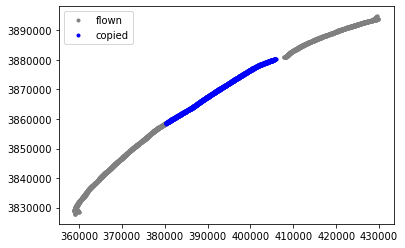

In [22]:
easting = df['easting'].values
northing = df['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()